In [4]:
import pandas as pd
import scipy.stats as s
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 15]
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.precision", 9)

In [10]:
filename = '~/data/pcap/as.tcp.nano.csv'

df = pd.read_csv(filename)
df

,ts,proto,src,sport,dst,dport,len,crc,pcrc
0,0.000001580,TCP,52.113.74.115,443,199.124.196.158,55810,52,8560,24091
1,0.000001654,TCP,35.42.191.176,443,175.84.167.88,55660,52,23216,34052
2,0.000010356,TCP,169.231.229.203,32767,175.68.40.16,28082,40,28838,65535
3,0.000019118,TCP,119.231.63.151,443,173.219.96.55,52937,1500,28546,59958
4,0.000030555,TCP,72.106.214.253,80,162.67.235.67,51417,1500,31071,30556
...,...,...,...,...,...,...,...,...,...
262461,0.546627827,TCP,123.138.50.178,80,203.67.62.218,57673,1500,64130,32839
262462,0.546629116,TCP,55.18.115.102,443,146.55.105.94,49218,1500,44583,8023
262463,0.546630897,TCP,206.191.183.122,80,45.170.75.254,36786,1404,39281,46172
262464,0.546632089,TCP,77.108.152.208,443,123.138.57.128,41910,1500,51574,44065


In [17]:
gaps = df.ts.diff().dropna()
gaps



1         0.000000074
2         0.000008702
3         0.000008762
4         0.000011437
5         0.000001795
             ...     
262461    0.000000067
262462    0.000001289
262463    0.000001781
262464    0.000001192
262465    0.000001281
Name: ts, Length: 262465, dtype: float64

In [18]:
gaps = gaps * 1000000000
gaps

1            74.000000000
2          8702.000000000
3          8762.000000000
4         11437.000000000
5          1795.000000000
               ...       
262461       66.999999992
262462     1288.999999960
262463     1781.000000034
262464     1192.000000039
262465     1280.999999964
Name: ts, Length: 262465, dtype: float64

In [19]:
from distfit import distfit

d = distfit()
d.fit_transform(gaps)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.01745e-07] [loc=2082.685 scale=2187.416]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.59084e-07] [loc=59.000 scale=2023.685]
[distfit] >[pareto    ] [0.23 sec] [RSS: 1.63811e-07] [loc=-40892.851 scale=40951.851]
[distfit] >[dweibull  ] [4.91 sec] [RSS: 1.46611e-08] [loc=1274.000 scale=1700.153]
[distfit] >[t         ] [19.7 sec] [RSS: 1.03266e-07] [loc=1267.763 scale=33.433]
[distfit] >[genextreme] [14.9 sec] [RSS: 3.44306e-07] [loc=60.372 scale=7.050]
[distfit] >[gamma     ] [4.06 sec] [RSS: 1.85483e-07] [loc=-22254.924 scale=154.512]
[distfit] >[lognorm   ] [8.59 sec] [RSS: 3.41426e-07] [loc=59.000 scale=3.929]
[distfit] >[beta      ] [10.7 sec] [RSS: 1.64764e-07] [loc=59.000 scale=138005.591]
[distfit] >[uniform   ] [0.00 sec] [RSS: 3.89469e-07] [loc=59.000 scale=43318.000]
[distfit] >[loggamma  ] [4.17 sec] [RSS: 2.08511e-07] [loc=-849802.902 scale=110071.982]
[distfit] >Compute confidence interval [pa

{'model': {'distr': <scipy.stats._continuous_distns.dweibull_gen at 0x131c4ce80>,
  'stats': 'RSS',
  'params': (0.46178486928640383, 1273.9999999955567, 1700.1532840392415),
  'name': 'dweibull',
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x136e2f1f0>,
  'score': 1.4661101977694864e-08,
  'loc': 1273.9999999955567,
  'scale': 1700.1532840392415,
  'arg': (0.46178486928640383,),
  'CII_min_alpha': -9074.322838403297,
  'CII_max_alpha': 11622.322838394406},
 'summary':          distr        score  LLE               loc             scale  \
 0     dweibull  0.000000015  NaN    1273.999999996    1700.153284039   
 1            t  0.000000103  NaN    1267.763082117      33.433252539   
 2        expon  0.000000159  NaN      58.999999997    2023.684510319   
 3       pareto  0.000000164  NaN  -40892.851220485   40951.851220482   
 4         beta  0.000000165  NaN      58.999999997  138005.590800008   
 5        gamma  0.000000185  NaN  -22254.924470262     154.512

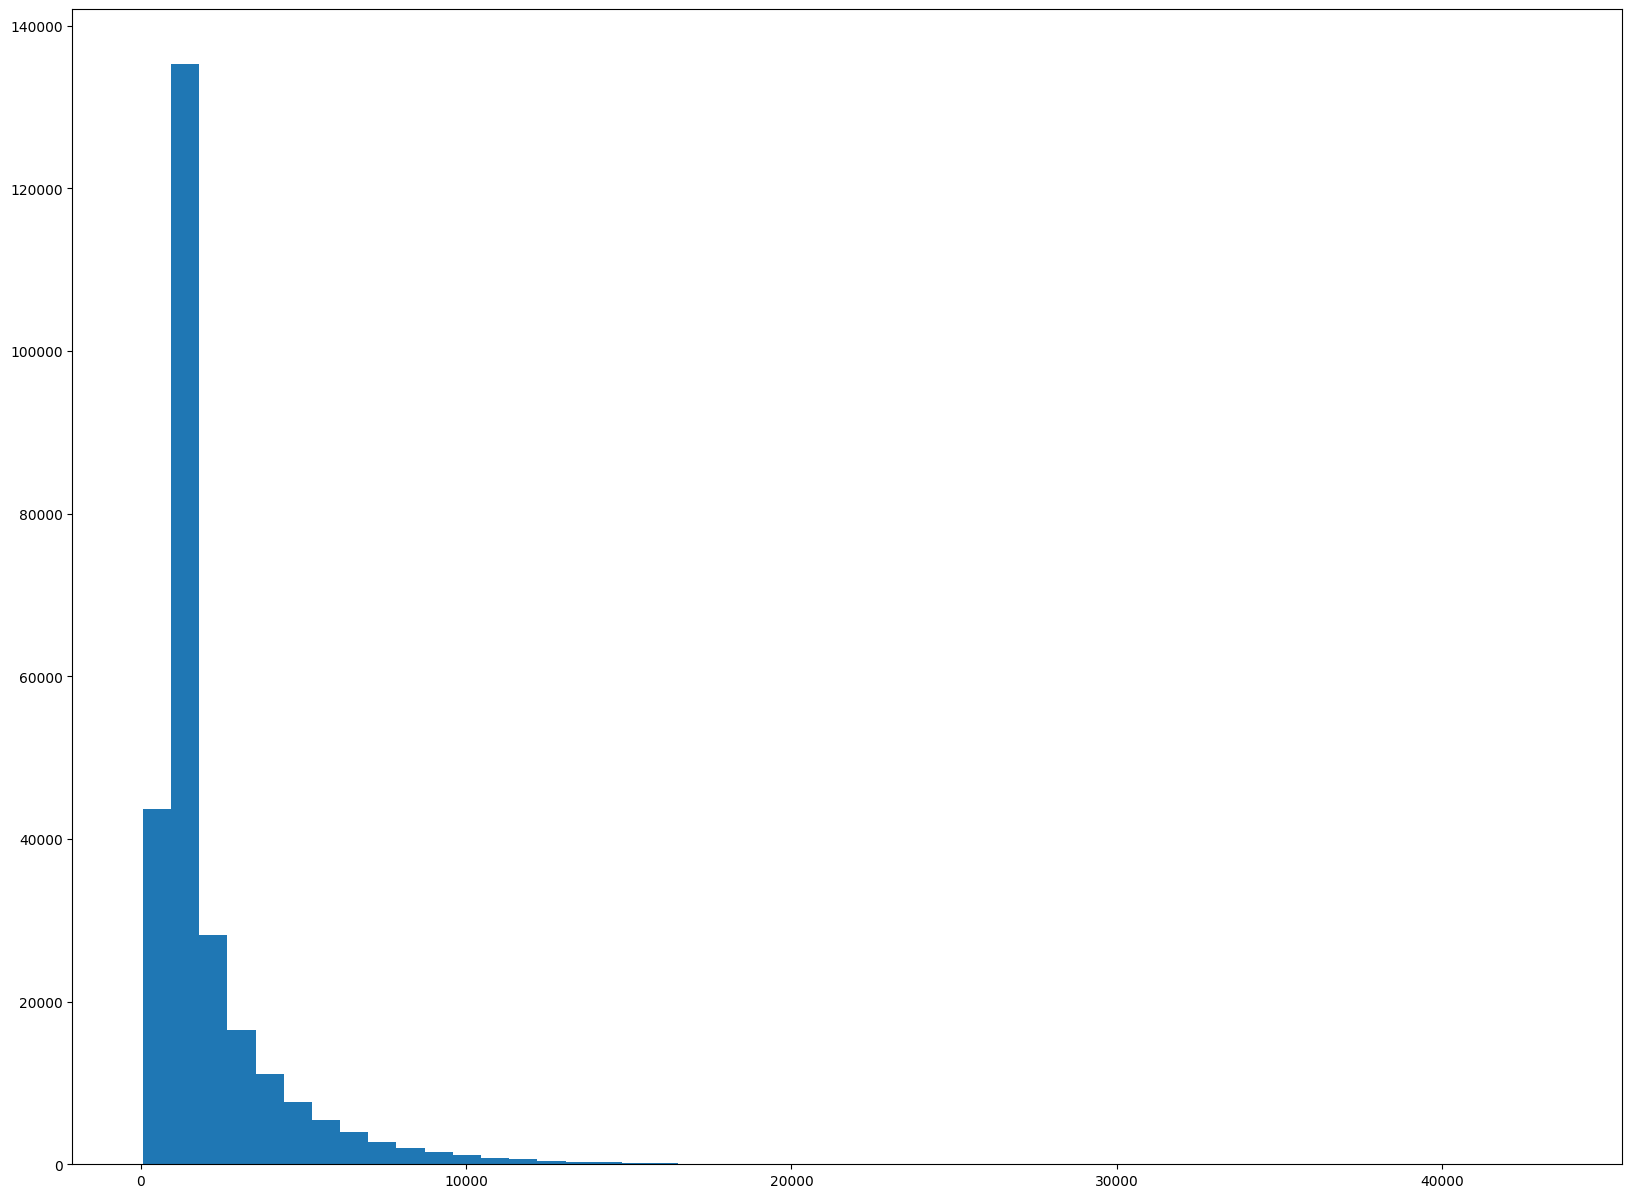

In [20]:
plt.hist(gaps, bins=50)
plt.show()

In [9]:
df.drop(df[df.isin([0.000000])].index)

,ts,proto,src,sport,dst,dport,len,crc,pcrc


## Ports

In [14]:
ports = {}

for key in ['sport', 'dport']:
    for port, items in df.groupby([key]):
        ports.setdefault(port, {})[key] = len(items)

for port, counts in sorted(ports.items(), key=lambda kv: max(kv[1].values()), reverse=True)[:30]:
    print(f"{port:>5}  {counts.get('sport', 0):>6}  {counts.get('dport', 0):>6}")

#plt.hist(df['sport'], bins=1024)

  443   71398  717835
   80  149703  611945
 9339      24  126595
 8100       0   27405
   22    1133   25143
35059   24043       0
48835   13094       0
52556    8815       0
52450      21    7124
45946    7073       0
51441    6724       0
59916    5743       0
48084    5472      94
48649    5472       0
60110    5286       2
22891    5251       0
41218    5248       0
 5770    5183       0
 4711    4736       0
57642       7    4595
   25    2365    4115
52620      18    3671
 3333    3426     331
49737      20    3278
51891    3165       2
50829    3123       2
44899      12    3120
57228       1    3103
 8080     870    3084
39428       6    3024


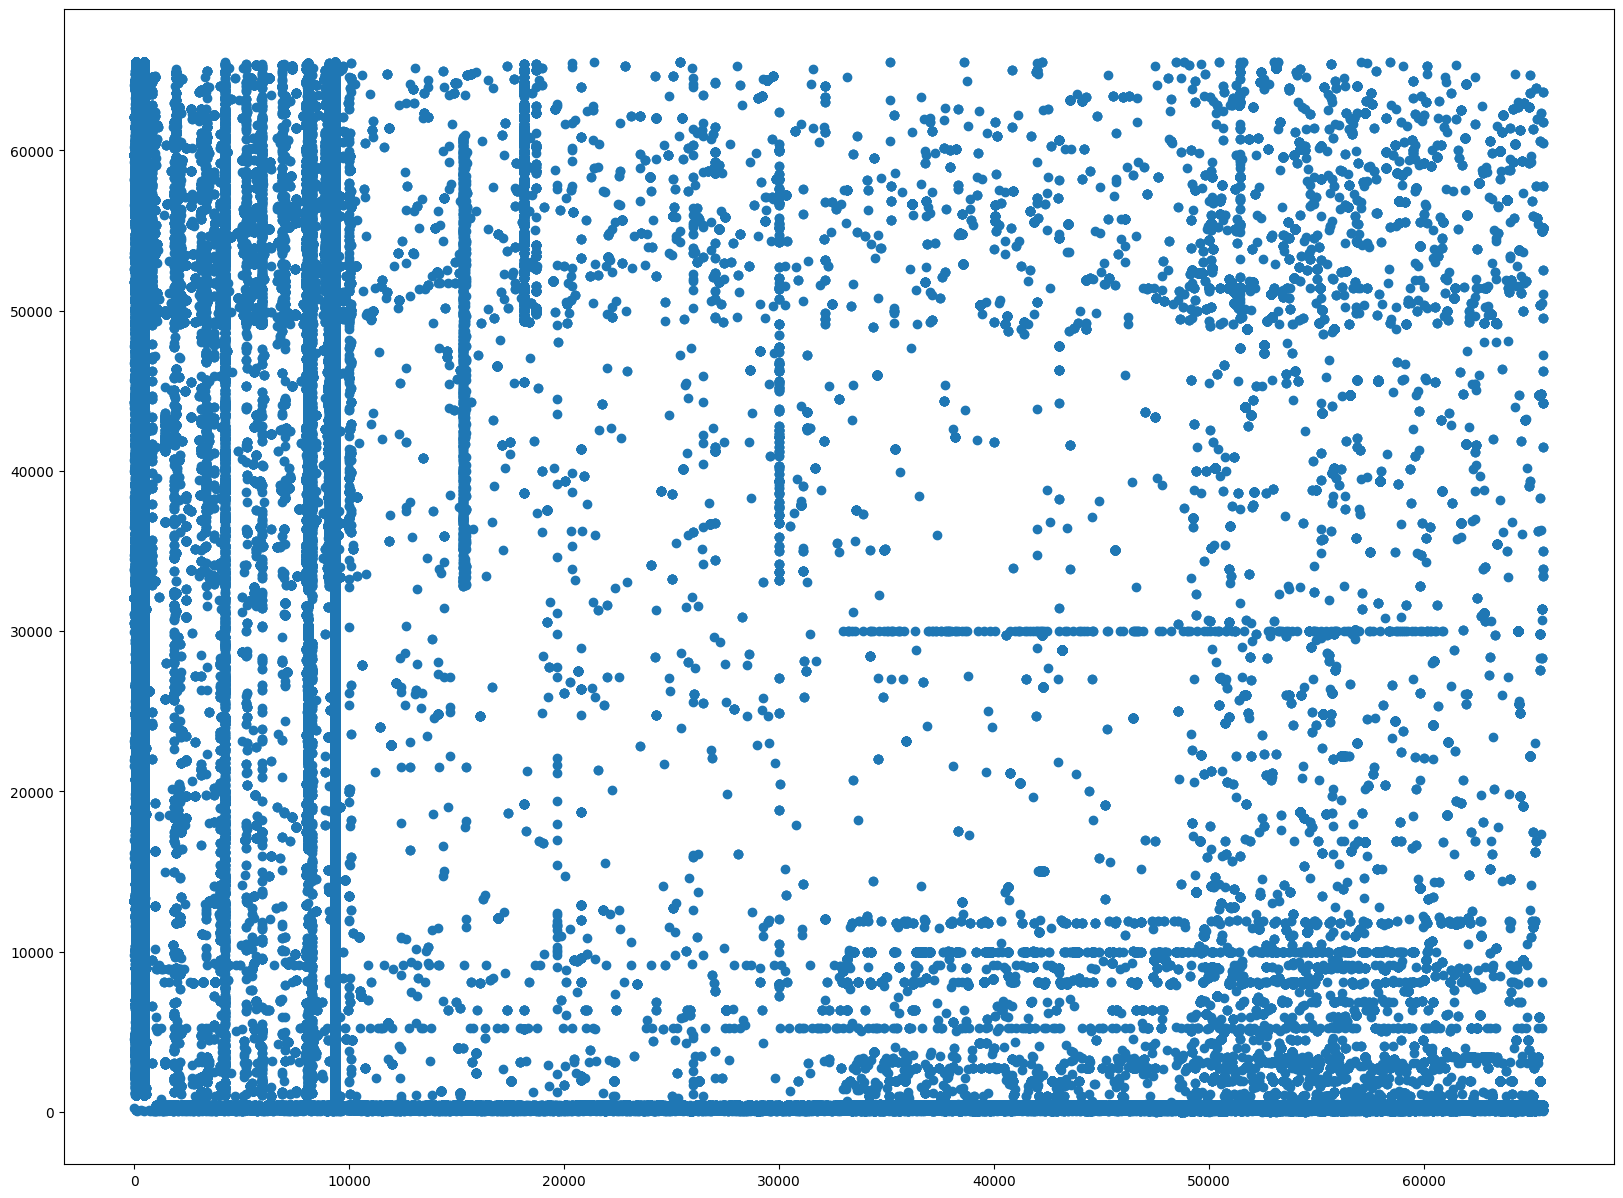

In [15]:
plt.scatter(df['dport'], df['sport'])
plt.show()

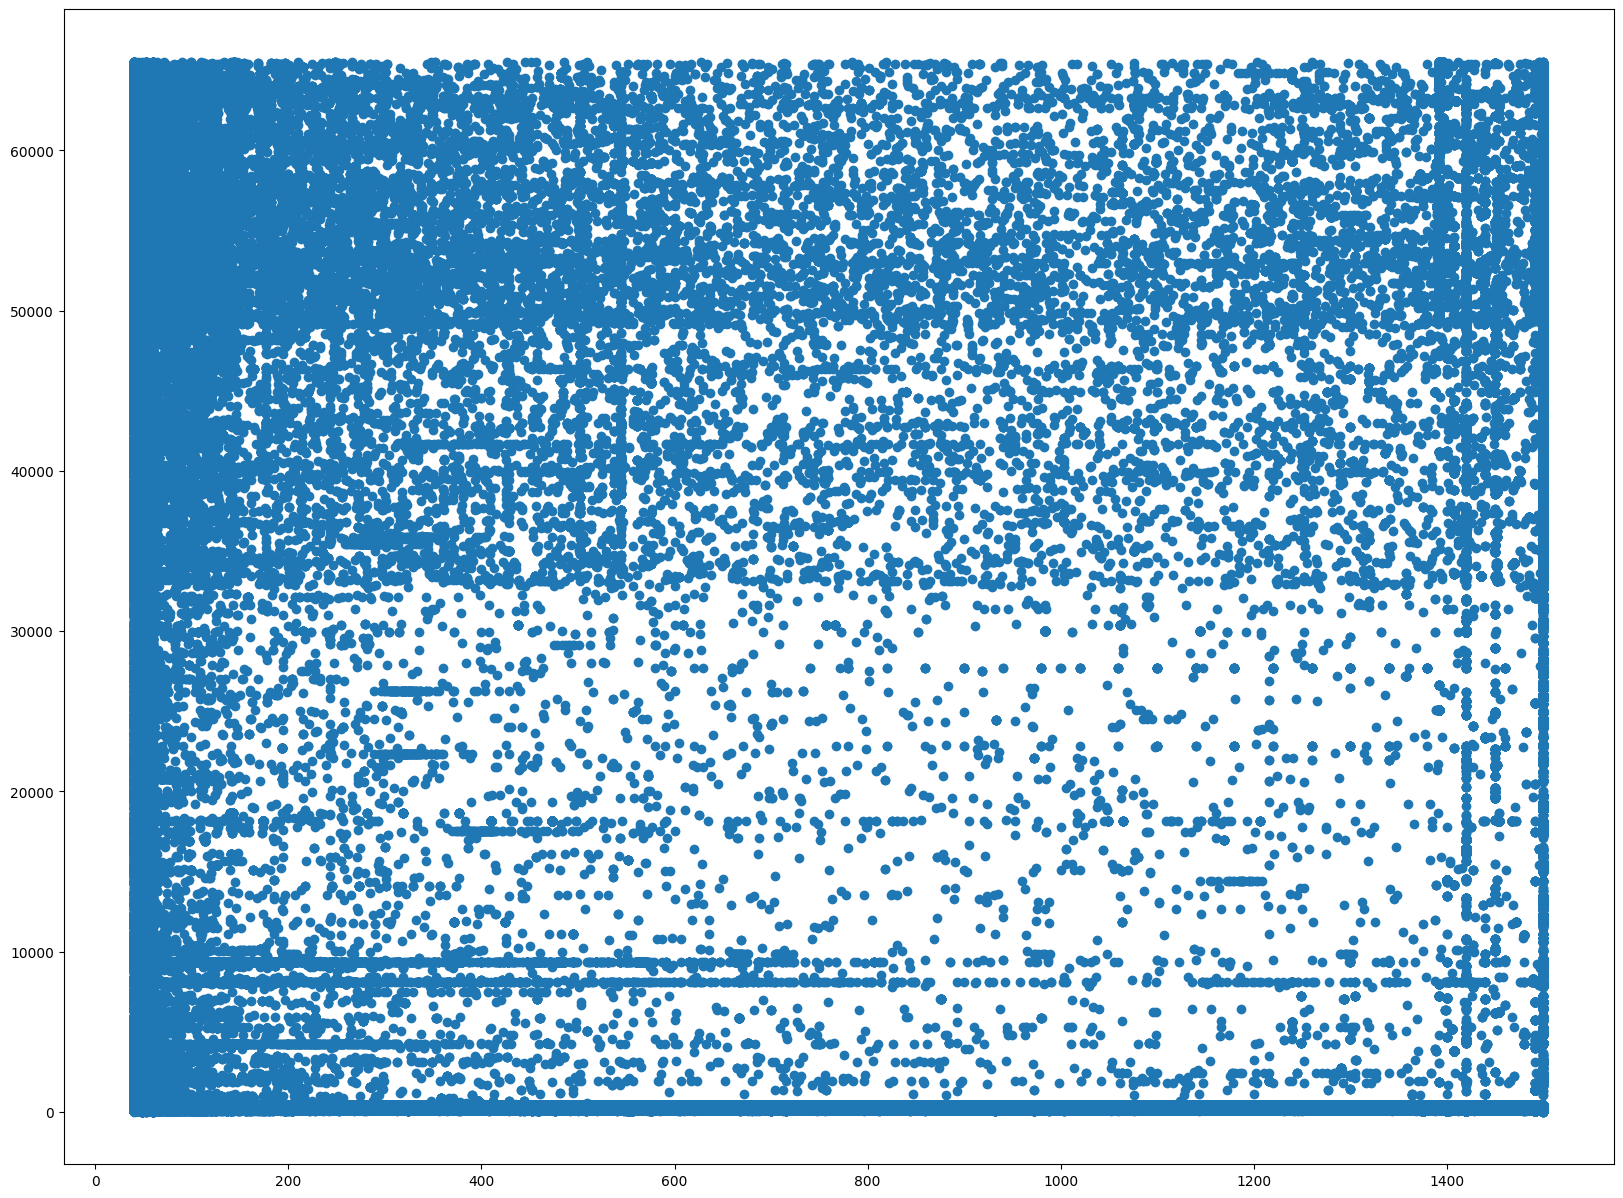

In [16]:
plt.scatter(df['len'], df['dport'])
plt.show()

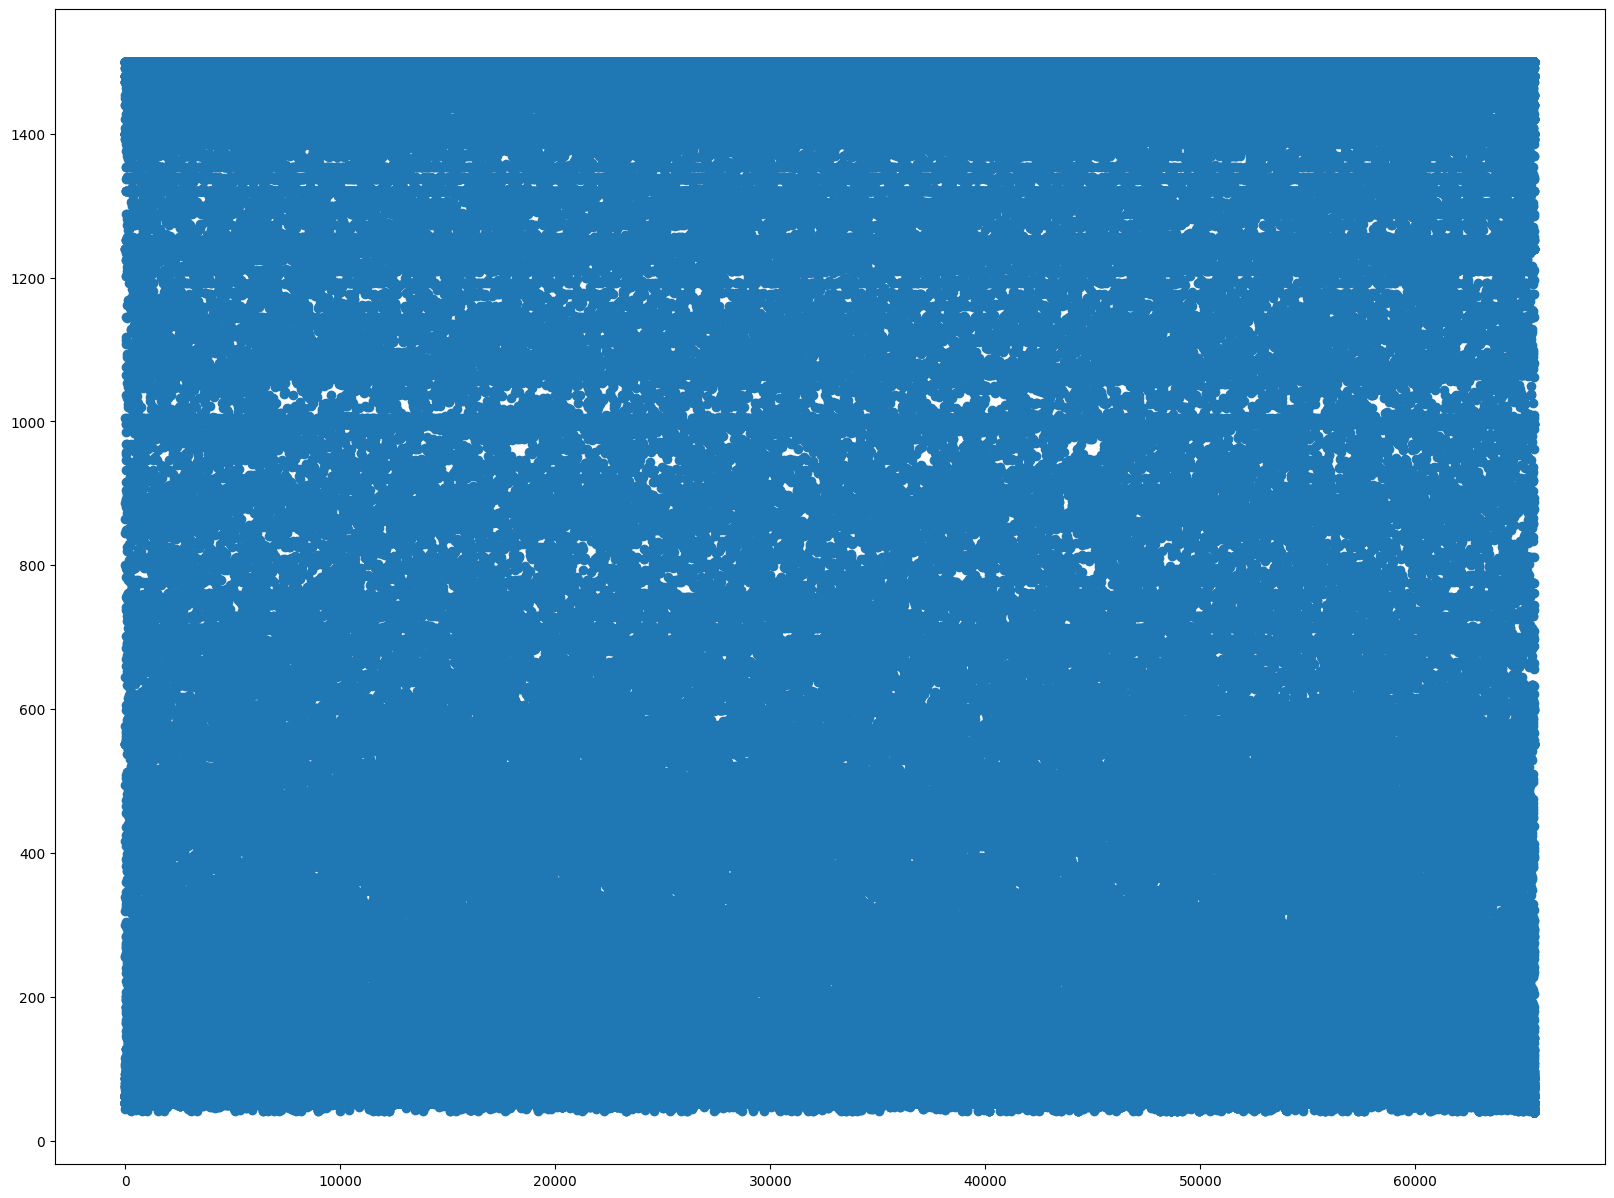

In [13]:
plt.scatter(df['pcrc'], df['len'])
plt.show()

## CRC

65535    3237
61241    1502
63559    1477
62276     909
61247     887
61287     781
61239     686
61249     594
61293     559
41705     490
61242     446
61255     363
61240     314
61261     288
61321     278
63595     263
59387     253
60213     252
19478     250
61301     209


(array([[2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02, 2.560e+02,
         2.560e+02, 2.560

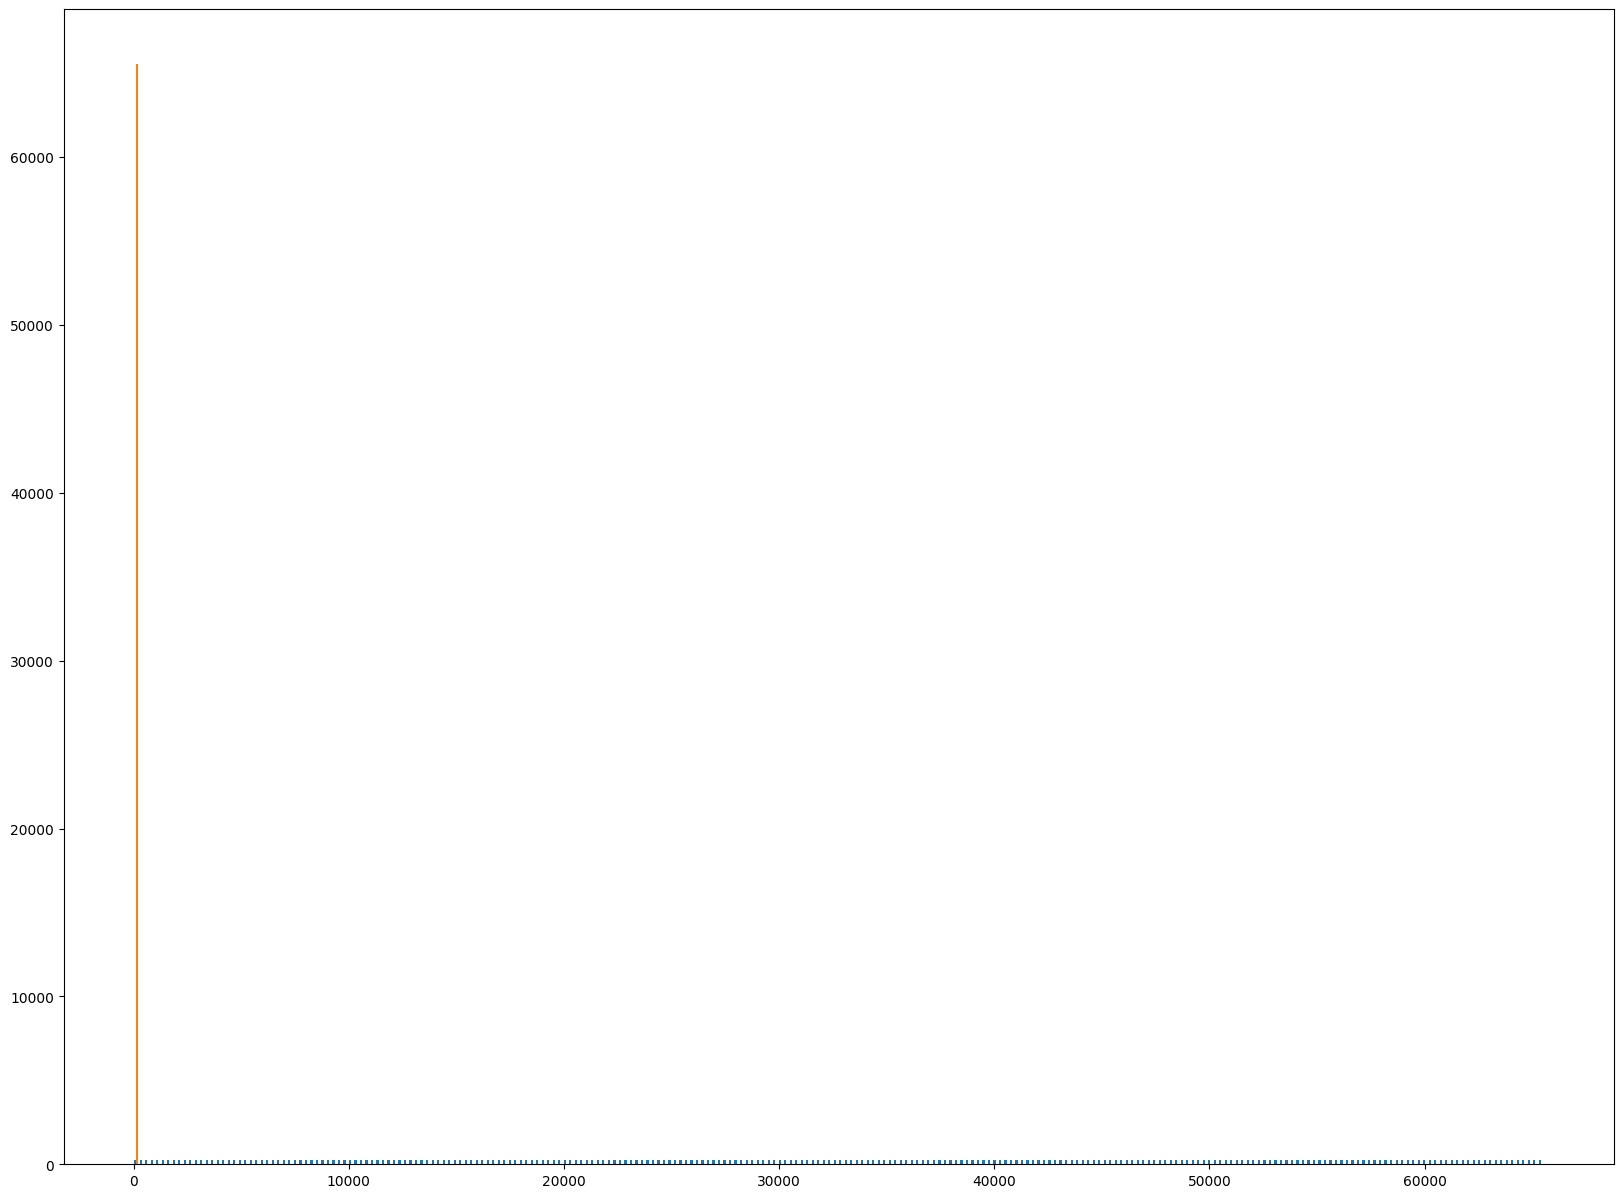

In [8]:
counts = [(c,len(g[g.len > 40])) for c,g in df.groupby(['pcrc'])]

for crc, count in sorted(counts, key=lambda c: c[1], reverse=True)[:20]:
    print(f"{crc:5}  {count:6}")

counts_df = pd.DataFrame(counts, columns=['pcrc', 'count'])
plt.hist(counts_df, bins=256)

[[17. 24. 33. ... 32. 31. 27.]
 [25. 23. 18. ... 32. 23. 18.]
 [17. 17. 20. ... 15. 22. 46.]
 ...
 [11. 20. 22. ... 19. 33. 26.]
 [22. 15. 22. ... 15. 41. 19.]
 [25. 29. 19. ... 12. 18.  0.]]


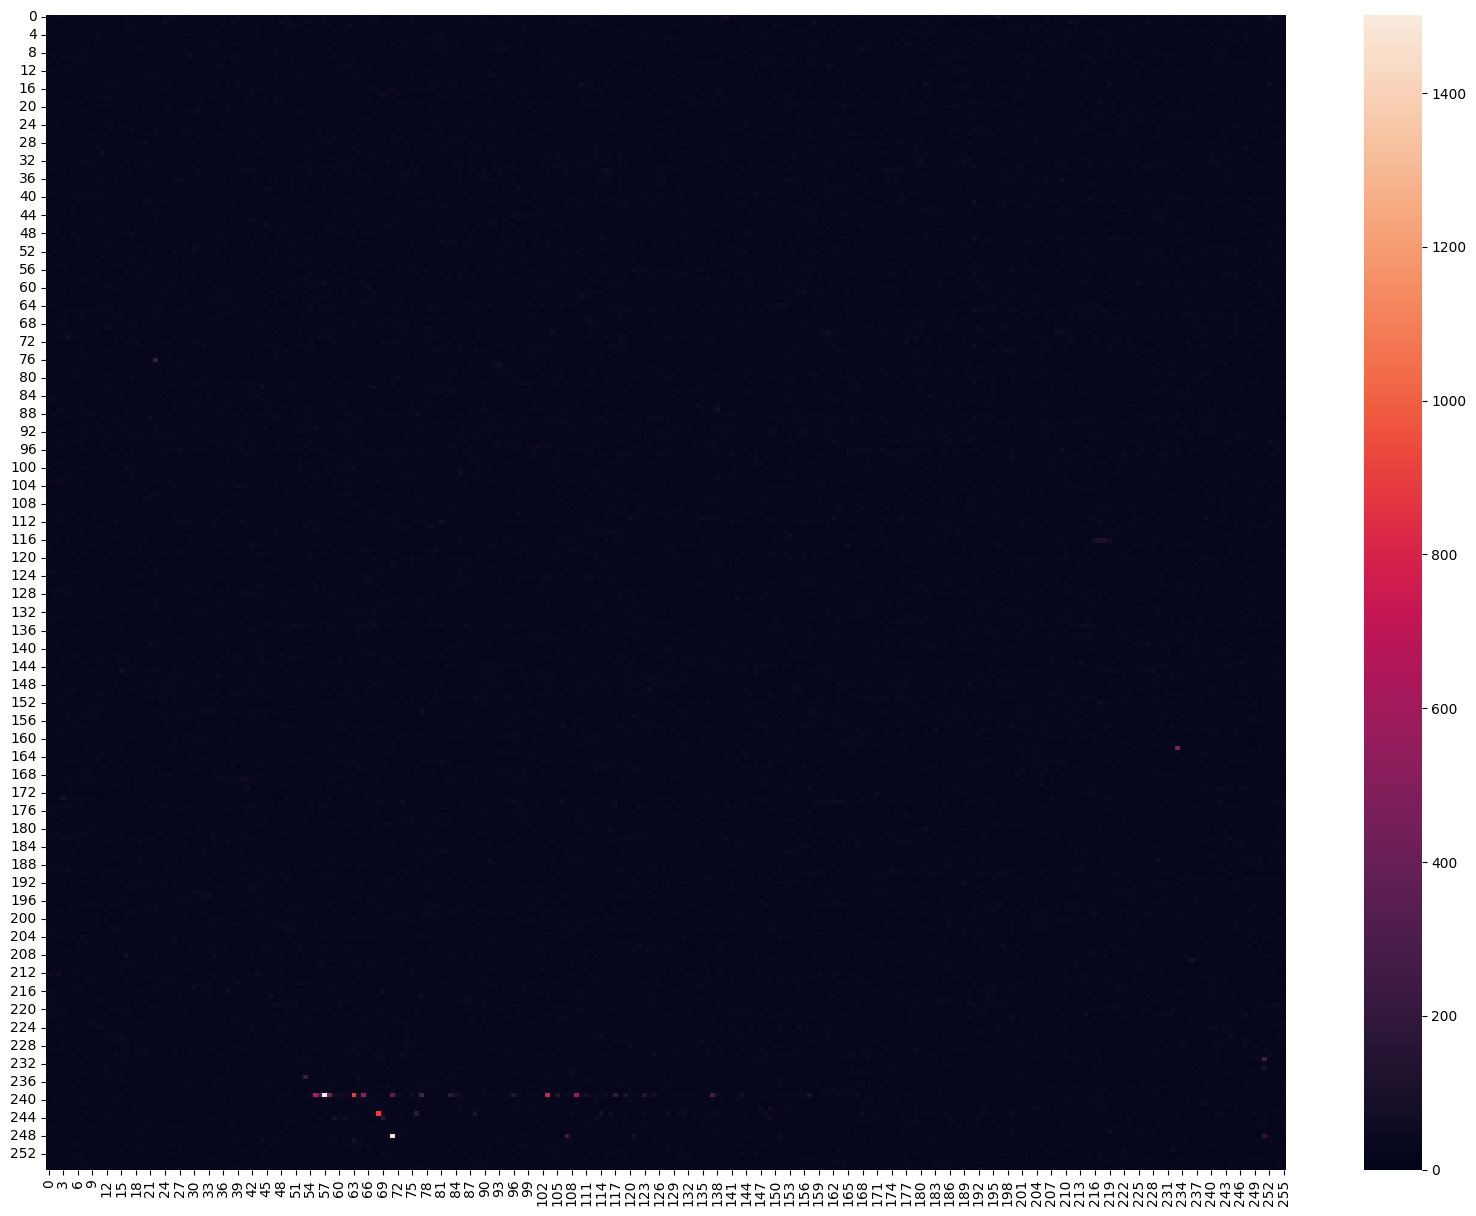

In [10]:
arr = np.zeros((256,256))
for crc, group in df.groupby(['pcrc']):
    if crc == 65535:
        continue
    a = crc >> 8
    b = crc & 255
    arr[a][b] = len(group[group.len > 40])

print(arr)
sns.heatmap(arr)
plt.show()

## FFT

In [21]:
grouped = df.groupby(['src', 'sport', 'dst', 'dport'])

largest = max(grouped, key=lambda kg: len(kg[1]))
largest

(('186.57.117.93', 80, '123.138.57.168', 39720),
                  ts proto            src  sport             dst  dport   len  \
 9790    0.023384422   TCP  186.57.117.93     80  123.138.57.168  39720  1500   
 9799    0.023397543   TCP  186.57.117.93     80  123.138.57.168  39720  1500   
 9810    0.023410089   TCP  186.57.117.93     80  123.138.57.168  39720  1500   
 9816    0.023417264   TCP  186.57.117.93     80  123.138.57.168  39720  1500   
 9823    0.023431182   TCP  186.57.117.93     80  123.138.57.168  39720  1500   
 ...             ...   ...            ...    ...             ...    ...   ...   
 259548  0.541381478   TCP  186.57.117.93     80  123.138.57.168  39720  1500   
 259564  0.541399822   TCP  186.57.117.93     80  123.138.57.168  39720  1500   
 259567  0.541411415   TCP  186.57.117.93     80  123.138.57.168  39720  1500   
 259572  0.541428640   TCP  186.57.117.93     80  123.138.57.168  39720  1500   
 259573  0.541431561   TCP  186.57.117.93     80  123.138.57

In [39]:
from numpy.fft import rfft, irfft, rfftfreq
from scipy import fftpack

train = largest[1].set_index('ts')['crc']
train

ts
0.015687     7498
0.015722    16213
0.015749    60722
0.015774    22701
0.015802     5017
            ...  
3.651838    17823
3.651844    51103
3.651851    40076
3.651865    15565
3.651878     4829
Name: crc, Length: 24031, dtype: int64

In [63]:
print(train.index[-1])
print(1/(train.size/train.index[-1]))
rfftfreq(train.size, d=1/train.index[-1])

3.651878
0.00015196529482751448


array([0.00000000e+00, 1.51965295e-04, 3.03930590e-04, ...,
       1.82555909e+00, 1.82571105e+00, 1.82586302e+00])

3.651878
24031 0.02
[0.00000000e+00 1.51965295e-04 3.03930590e-04 ... 1.82555909e+00
 1.82571105e+00 1.82586302e+00]
24030


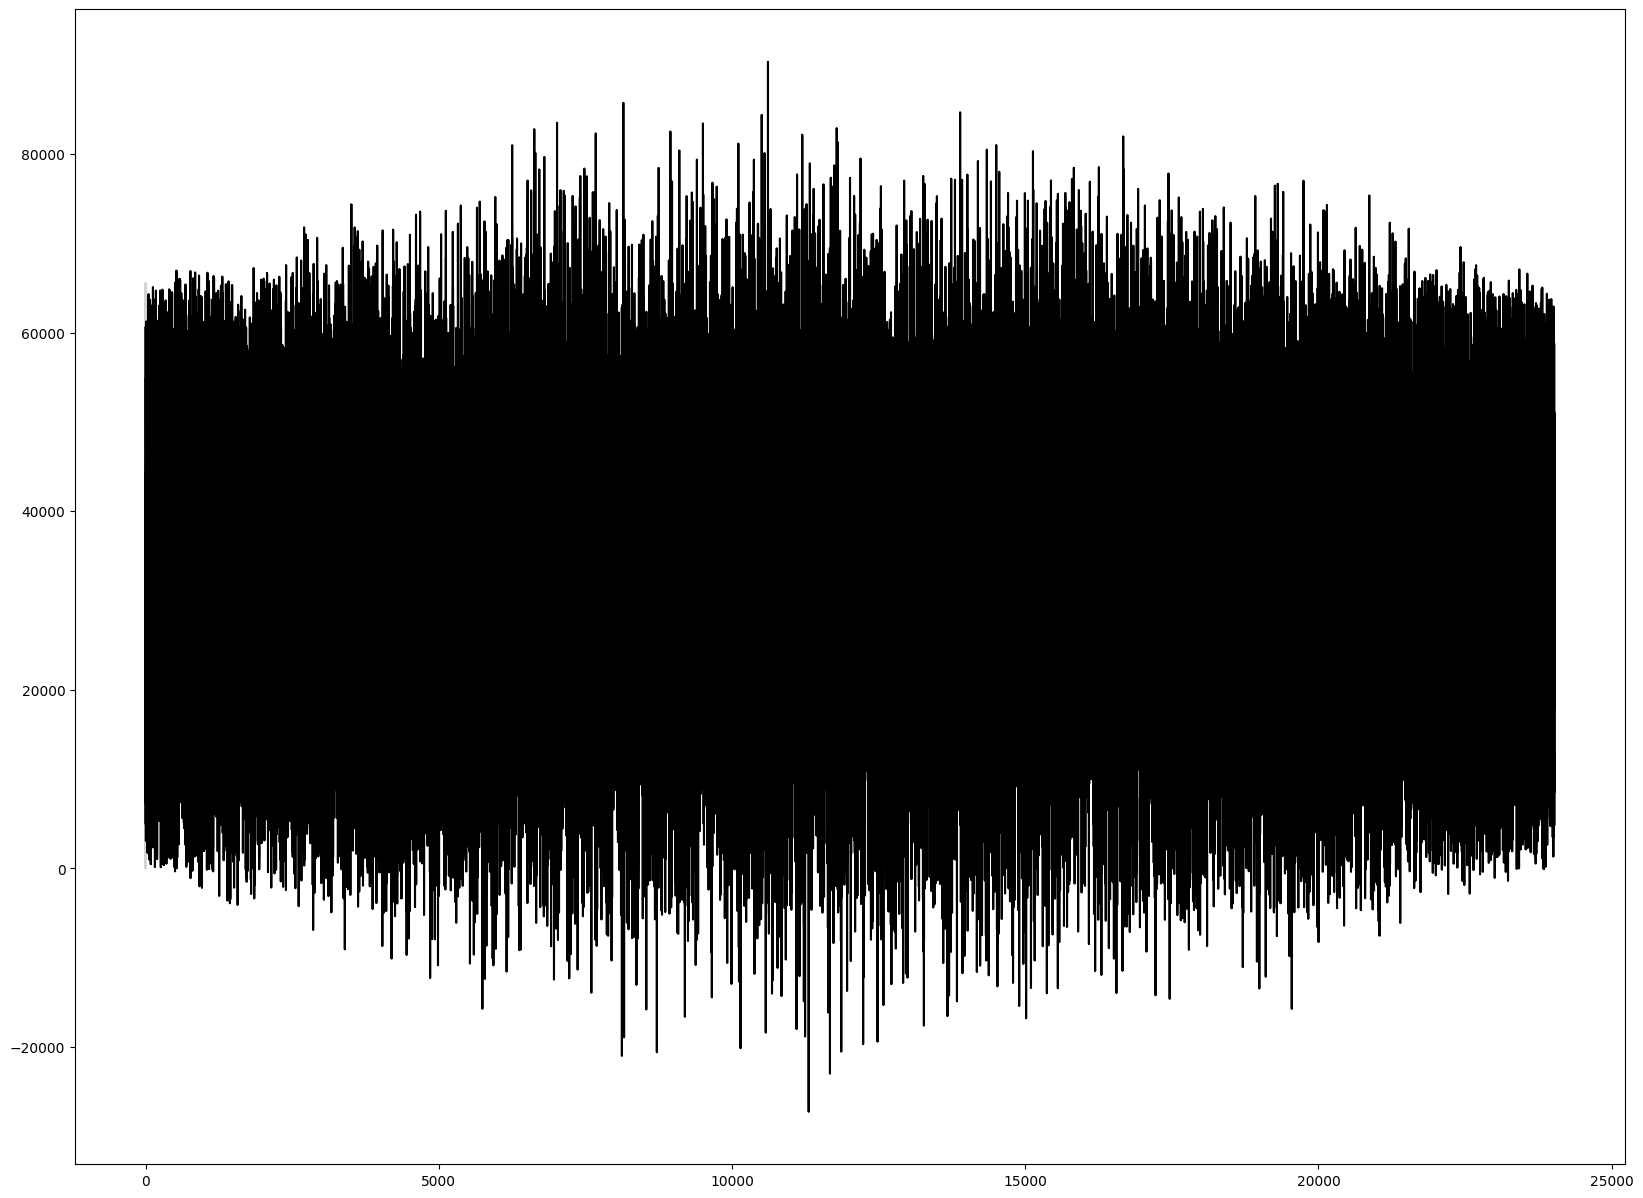

In [66]:
def low_pass(s, threshold=1e4):
    fourier = rfft(s)
    print(s.size, 2e-2)
    frequencies = rfftfreq(s.size, 1/ s.index[-1]) # d=2e-2 / s.size)
    print(frequencies)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)
print(train.index[-1])
lf_signal_1 = low_pass(train)
print(len(lf_signal_1))
plt.plot(train, color='lightgray')
plt.plot(lf_signal_1, color='black')

In [4]:
# group packets by unique src-dst-dport and then fit a distribution to each packet subset

# limiting to the first 10k rows for testing
grouped = df.groupby(['src', 'sport', 'dst', 'dport'])
print(sum(1 for g in grouped if len(g[1]) >= 30))


8035


In [5]:
from generator.checksum import Checksum
assembled = {}

for key, group in grouped:
    # if less than 30 packets then skip, can't really fit a distribution
    if len(group) < 30:
        continue

    payloads = []
    partial = None

    for index, packet in group.iterrows():
        if partial is not None:
            partial[1] += packet.len
            partial[2] += packet.pcrc
        else:
            partial = [packet.ts, packet.len, Checksum(packet.pcrc)]

        if packet.len < 1500:
            payloads.append([partial[0], partial[1], int(partial[2])])
            partial = None

# throw out if stream didn't end
#    if partial is not None:
#        payloads.append(partial)

    if len(group) == len(payloads):
        continue

    if len(payloads) == 0:
        continue

    # remove timestamp offsets
    for p in payloads:
        p[0] -= payloads[0][0]

    assembled[key] = payloads


In [13]:
servers = {}
clients = {}

assembled = {k:v for k,v in assembled.items() if len(v) > 0}

for stream, payloads in assembled.items():
    payloads = pd.DataFrame(payloads, columns=['ts', 'len', 'crc'])
    if max(payloads.len) >= 1500:
        servers[stream] = payloads
    else:
        clients[stream] = payloads

print(len(servers), len(clients))
servers = {k:v for k,v in servers.items() if len(v) >= 30}
clients = {k:v for k,v in clients.items() if len(v) >= 30}
print(len(servers), len(clients))

354 4
130 0


/Users/qte2333/repos/netsim/.venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:3382: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
/Users/qte2333/repos/netsim/.venv/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2052: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
/Users/qte2333/repos/netsim/.venv/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2052: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best wh

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
invgauss,2.699185e-07,2924.850304,-1445.245084,inf,0.479963,2.065864e-16
norminvgauss,2.701257e-07,2927.296943,-1440.870031,inf,0.972396,2.366928e-117
levy,2.705768e-07,2923.675064,-1449.379873,inf,0.477689,2.985679e-16
burr,2.907959e-07,2694.068093,-1435.339968,inf,0.336835,4.303993e-08
mielke,2.908674e-07,2694.324043,-1435.321520,inf,0.336698,4.367268e-08


/Users/qte2333/repos/netsim/.venv/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/qte2333/repos/netsim/.venv/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


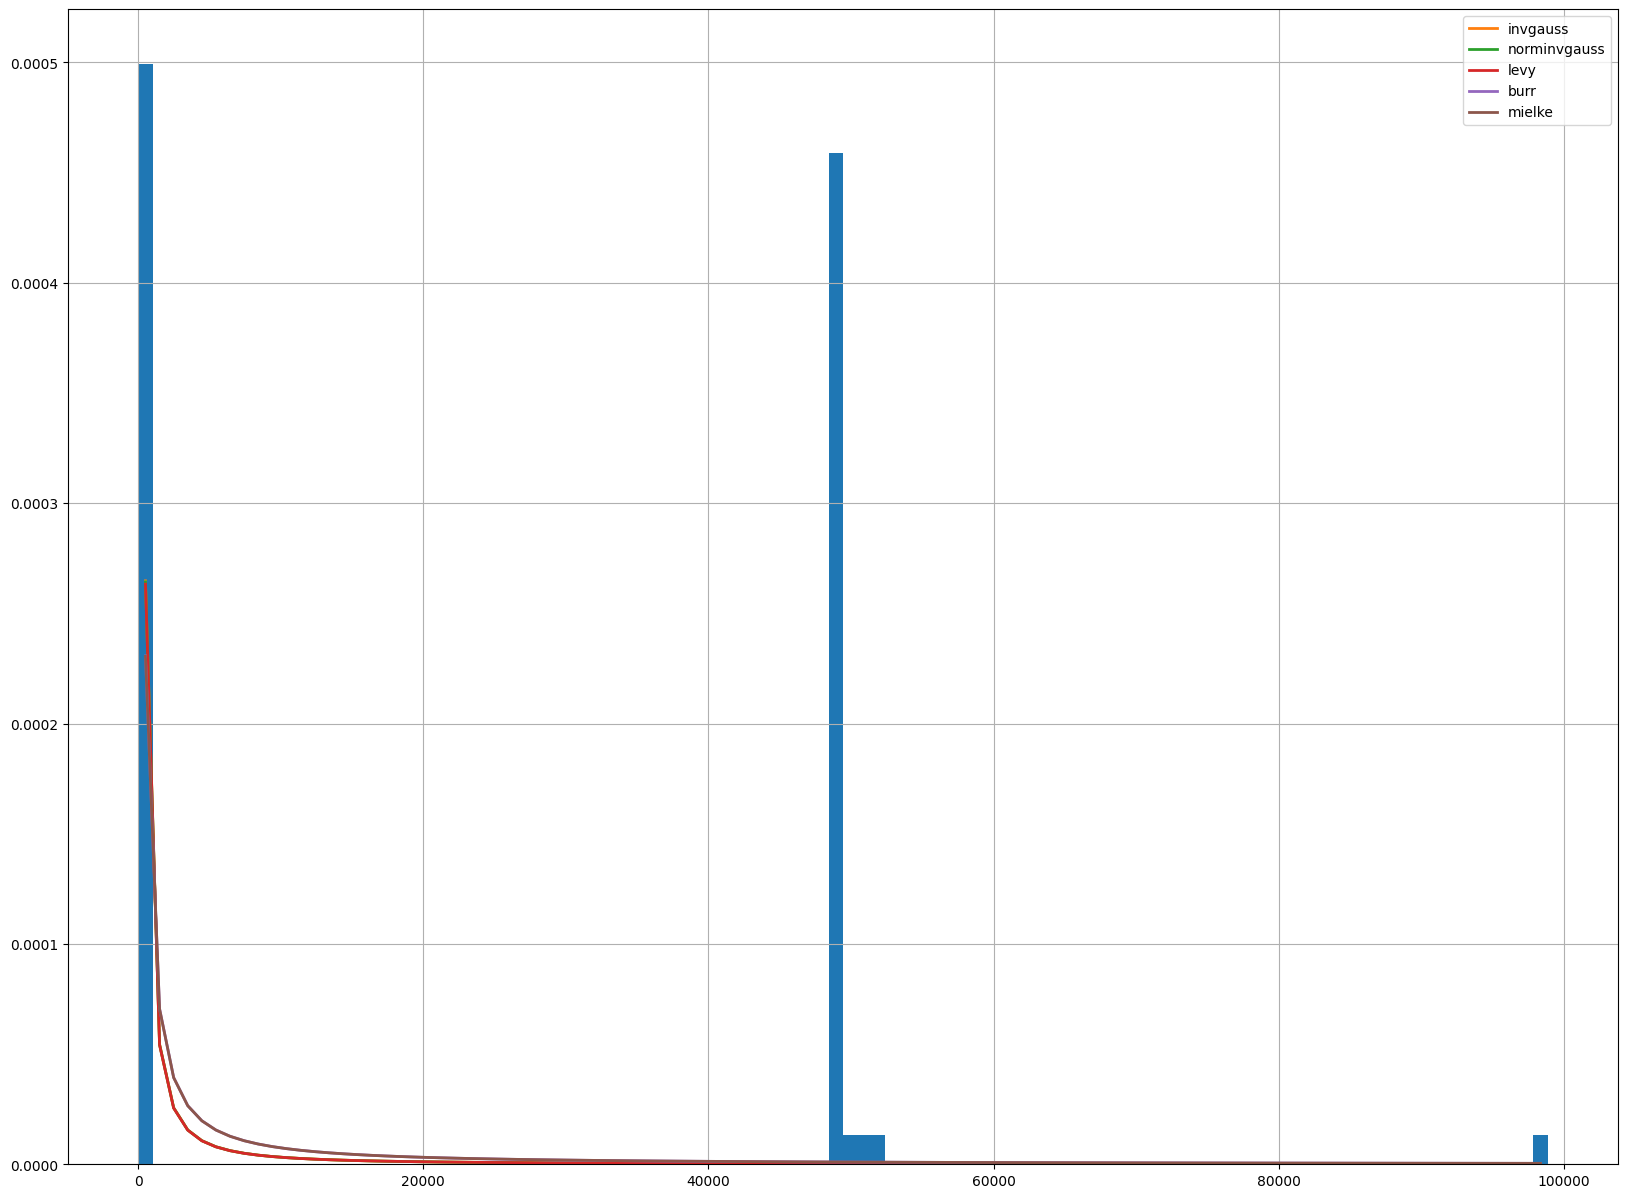

In [7]:
from fitter import Fitter

# iterate over groups and split each into (src,dst,port) tuple and the matching rows group_df
for stream, payloads in list(servers.items())[:4]:
    # calculate gaps between each timestamp, multiply to get integers
    times = payloads.ts * 1000000
    #times = times.astype({'ts':'int'})
    gaps = times.diff().dropna()
    # multiply by 1m to convert seconds to microseconds
    #gaps = gaps * 1000000
    # convert to integers
    #gaps = gaps.astype({'ts':'int'})

    f = Fitter(gaps)#, distributions=['gamma', 'lognorm', 'beta', 'burr', 'weibull'])
    f.fit()
    servers['fitter'] = f
#    best = f.get_best(method='sumsquare_error')

f.summary()

In [8]:
def plot_grid(data, H, W, n_bins=None, bin_size=None, max_x=None, plot_fn = lambda ax: ax.hist):
    data = data[:H*W]

    if max_x is None:
        max_x = max(max(d) for d in data)

    if n_bins is None:
        n_bins = 50

    if bin_size is None:
        bin_size = max_x // n_bins

    n_bins = int(max_x // bin_size)

    fig, axs = plt.subplots(H, W)

    for i, d in enumerate(data):
        w = i % W
        h = i // H

        plot_fn(axs[h,w])(d, bins=n_bins, range=[0, (n_bins + 1) * bin_size])
    
    return fig, axs


/Users/qte2333/repos/netsim/.venv/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/qte2333/repos/netsim/.venv/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


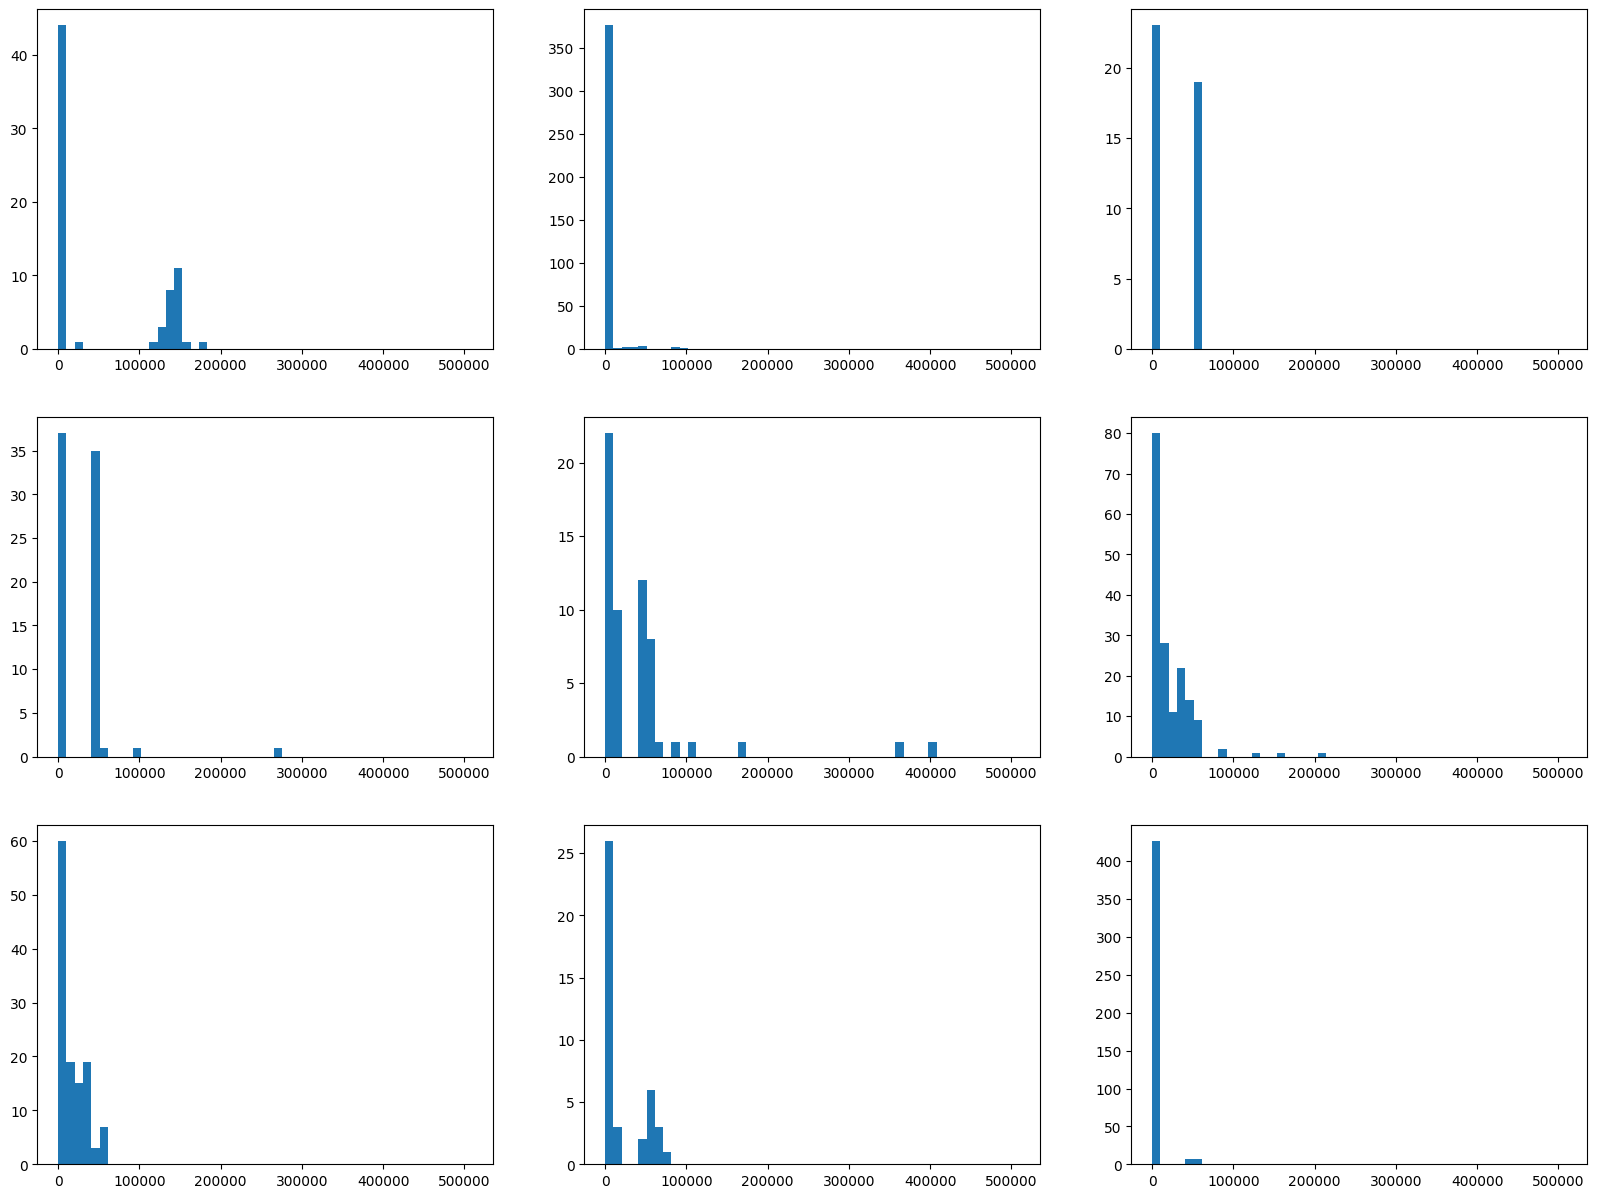

In [14]:

gaps = [None]*9
for i,_ in enumerate(gaps):
    payloads = list(servers.values())[i]
    times = payloads.ts * 1000000
    #times = times.astype({'ts':'int'})
    gaps[i] = times.diff().dropna()

plot_grid(gaps, 3, 3, max_x=500000)

plt.show()

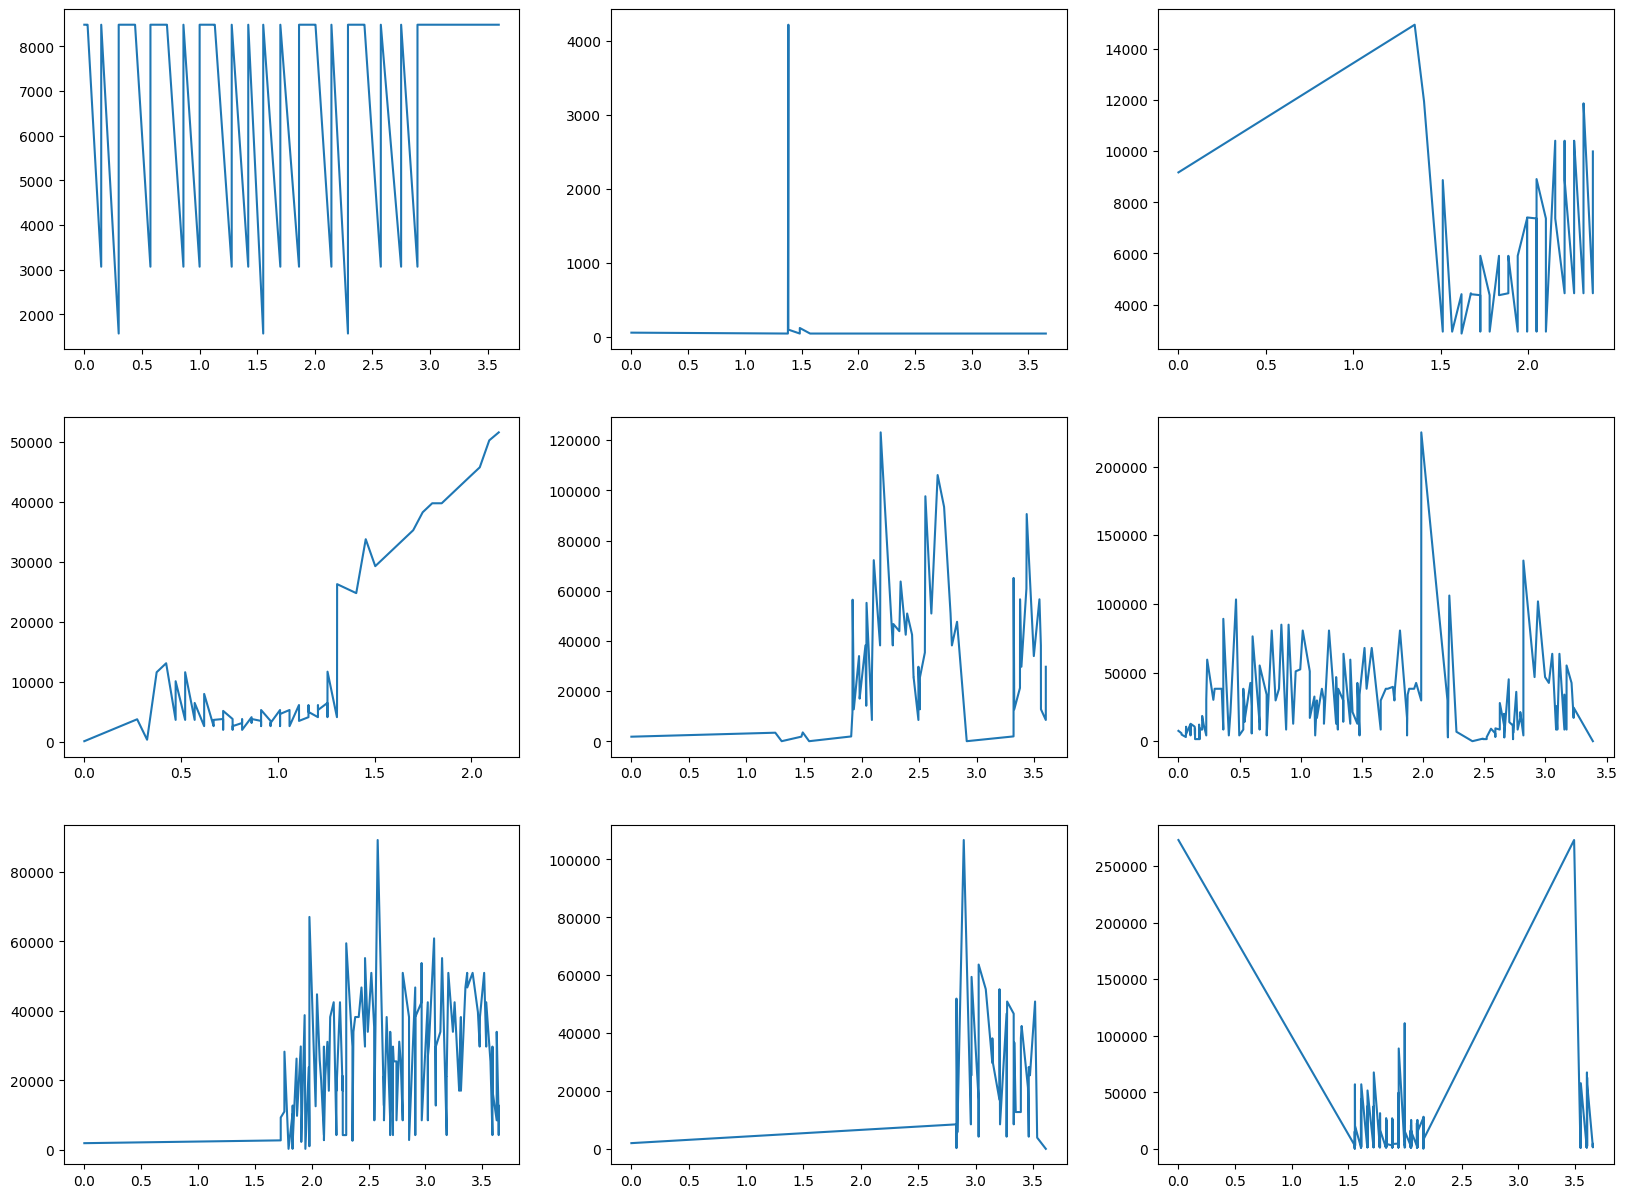

In [15]:

H = W = 3
fig, axs = plt.subplots(H, W)
for i, d in enumerate(servers.values()):
    if i >= H*W:
        break
    w = i % W
    h = i // H
    axs[h,w].plot(d.ts, d.len)

plt.show()

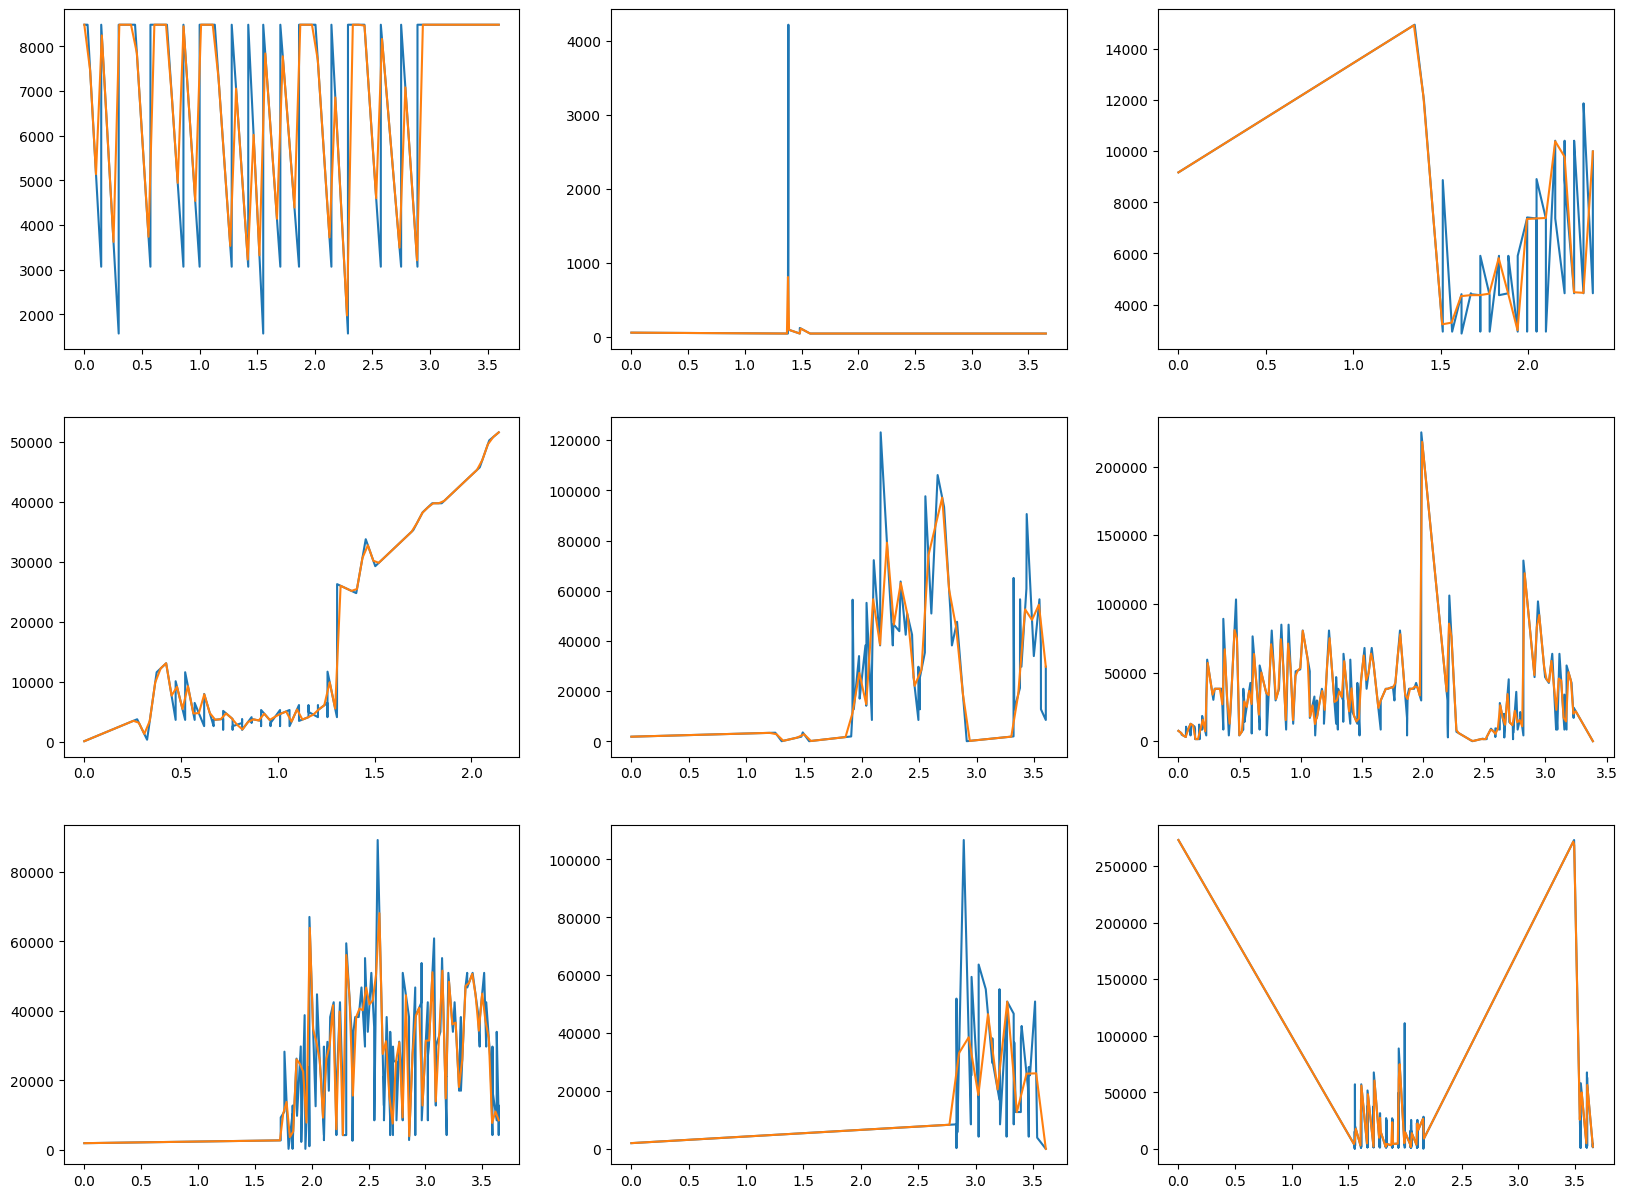

In [16]:
from scipy.interpolate import interp1d

H = W = 3
fig, axs = plt.subplots(H, W)
for i, d in enumerate(servers.values()):
    if i >= H*W:
        break

    x = d.ts
    y = d.len

    f1 = interp1d(x, y)
    #f2 = interp1d(x, y, kind='cubic')
    
    xnew = np.linspace(min(x), max(x), len(x)+1, endpoint=True)
    ynew = f1(xnew)

    w = i % W
    h = i // H
    axs[h,w].plot(x, y)
    axs[h,w].plot(xnew, ynew)

plt.show()



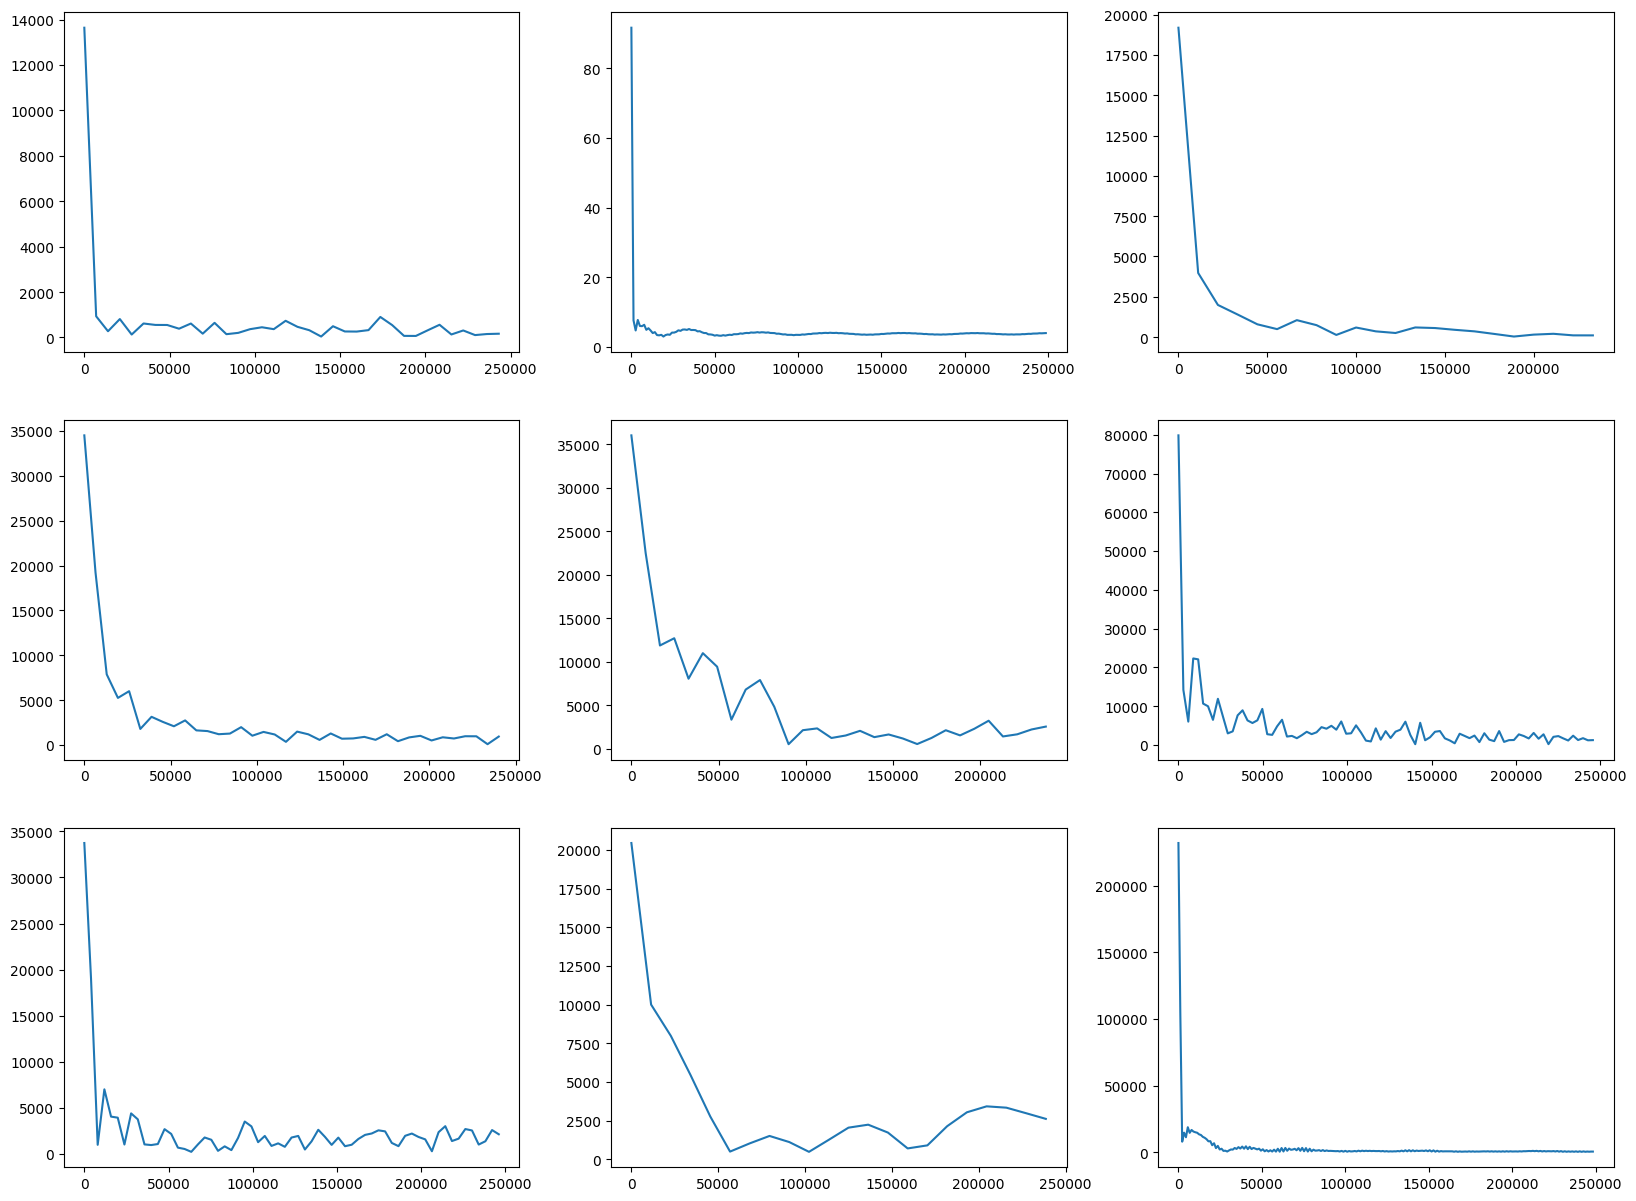

In [17]:
from scipy.fft import fft, fftfreq

H = W = 3
fig, axs = plt.subplots(H, W)
for i, d in enumerate(servers.values()):
    if i >= H*W:
        break

    x = d.ts
    y = d.len

    f1 = interp1d(x, y)
    #f2 = interp1d(x, y, kind='cubic')
    
    xnew = np.linspace(min(x), max(x), len(x)+1, endpoint=True)
    ynew = f1(xnew)

    yf = fft(ynew)
    N = len(yf)
    T = 1/500000
    xf = fftfreq(N, T)[:N//2]

    w = i % W
    h = i // H
    axs[h,w].plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.show()

In [22]:

fitted = []

# iterate over groups and split each into (src,dst,port) tuple and the matching rows group_df
for key, group in grouped:
    # if less than 30 packets then skip, can't really fit a distribution
    if len(group) < 100:
        continue

    # calculate gaps between each timestamp, multiply to get integers
    times = group.ts * 1000000
    #times = times.astype({'ts':'int'})
    gaps = times.diff().dropna()
    # multiply by 1m to convert seconds to microseconds
    #gaps = gaps * 1000000
    # convert to integers
    #gaps = gaps.astype({'ts':'int'})

    p = s.weibull_min.fit(gaps)#, floc=0, fscale=1)
    fitted.append((key, *p))
    #break
    #print(key, p)

    #f = Fitter(gaps)#, distributions=['gamma', 'lognorm', 'beta', 'burr', 'weibull'])
    #f.fit()
    #best = f.get_best(method='sumsquare_error')
    #print(best)from fitter import Fitter
    #break
    # best = Fitter(...)  #fit distribution of gaps
    # print(src_dst_port, best)

fit_df = pd.DataFrame(fitted, columns=['stream', 'shape', 'loc', 'scale'])
fit_df
#f.summary()

,stream,shape,loc,scale
0,"(1.108.124.183, 27343, 1.108.195.74, 80)",0.465434,-1.168295e-24,2818.356902
1,"(1.108.124.185, 50616, 1.108.202.165, 443)",0.233708,1.000000e+00,12685.745763
2,"(1.108.124.187, 54384, 1.108.195.96, 443)",0.099673,1.000000e+00,39856.183995
3,"(1.108.124.190, 56944, 1.108.198.52, 443)",0.488009,1.000000e+00,1030.740253
4,"(1.108.124.193, 59916, 1.108.197.236, 443)",0.188888,1.000000e+00,912.046719
...,...,...,...,...
2179,"(99.158.44.181, 58343, 1.47.181.3, 8100)",0.232794,6.000000e+00,42136.925500
2180,"(99.158.44.181, 61031, 3.132.4.77, 8100)",0.297146,7.000000e+00,2657.432320
2181,"(99.165.215.77, 60520, 145.103.202.70, 80)",0.240309,-9.875184e-27,29156.732380
2182,"(99.57.187.117, 40188, 1.149.129.165, 9339)",0.450350,-4.496194e-23,1038.939565
